17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 50s 120ms/step - accuracy: 0.6881 - loss: 0.5600 - val_accuracy: 0.8579 - val_loss: 0.3295
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 45s 115ms/step - accuracy: 0.9044 - loss: 0.2507 - val_accuracy: 0.8507 - val_loss: 0.3693
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 118ms/step - accuracy: 0.9327 - loss: 0.1881 - val_accuracy: 0.8657 - val_loss: 0.3169
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 119ms/step - accuracy: 0.9487 - loss: 0.1392 - val_accuracy: 0.8628 - val_loss: 0.3721
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 46s 118ms/step - accuracy: 0.9639 - loss: 0.1054 - val_accuracy: 0.8560 - val_loss: 0.4088


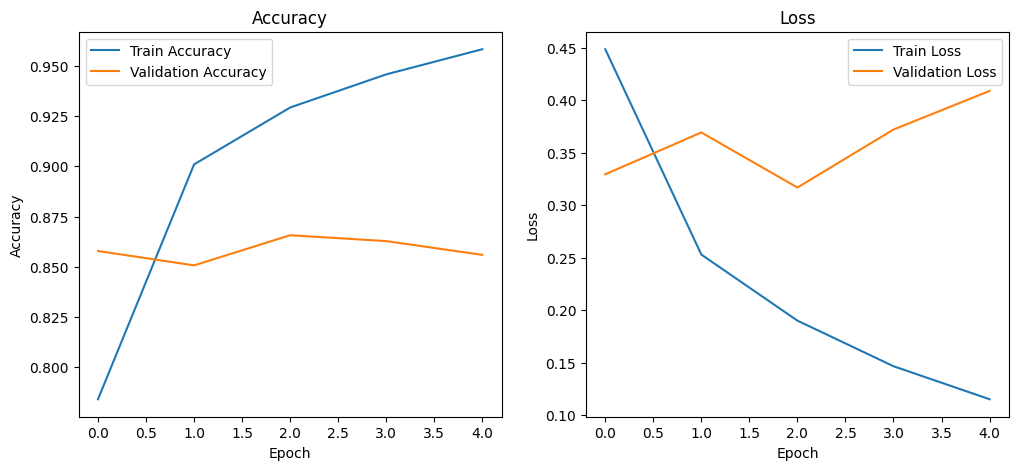

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
Review 1: Negative (Score: 0.05)
Review 2: Positive (Score: 1.00)
Review 3: Positive (Score: 0.89)
Review 4: Positive (Score: 0.74)
Review 5: Positive (Score: 1.00)


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt


num_words = 10000
max_len = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)


x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


model = Sequential([
    Embedding(input_dim=num_words, output_dim=32, input_length=max_len),
    LSTM(32),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=5, batch_size=64)


plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


sample_reviews = x_test[:5]
predictions = model.predict(sample_reviews)
for i, pred in enumerate(predictions):
    print(f"Review {i+1}: {'Positive' if pred>0.5 else 'Negative'} (Score: {pred[0]:.2f})")
